## Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import warnings
warnings.filterwarnings('ignore')
import librosa.display
from IPython.display import Audio ## For Audio Files

## Loading the Dataset

In [2]:
filepath = []
labels = []
for dirname, _, filenames in os.walk('Dataset'):
    for filename in filenames:
        filepath.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())

In [3]:
filepath[:2]

['Dataset\\OAF_angry\\OAF_back_angry.wav',
 'Dataset\\OAF_angry\\OAF_bar_angry.wav']

In [4]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [5]:
df = pd.DataFrame()
df['Speech'] = filepath
df['Emotion'] = labels

In [6]:
df.head()

,Speech,Emotion
0,Dataset\OAF_angry\OAF_back_angry.wav,angry
1,Dataset\OAF_angry\OAF_bar_angry.wav,angry
2,Dataset\OAF_angry\OAF_base_angry.wav,angry
3,Dataset\OAF_angry\OAF_bath_angry.wav,angry
4,Dataset\OAF_angry\OAF_bean_angry.wav,angry


In [7]:
df.tail()

,Speech,Emotion
5595,Dataset\YAF_sad\YAF_witch_sad.wav,sad
5596,Dataset\YAF_sad\YAF_yearn_sad.wav,sad
5597,Dataset\YAF_sad\YAF_yes_sad.wav,sad
5598,Dataset\YAF_sad\YAF_young_sad.wav,sad
5599,Dataset\YAF_sad\YAF_youth_sad.wav,sad


## EDA

In [8]:
df['Emotion'].value_counts()

neutral    800
angry      800
fear       800
ps         800
happy      800
disgust    800
sad        800
Name: Emotion, dtype: int64

<AxesSubplot:title={'center':'Emotion Count'}>

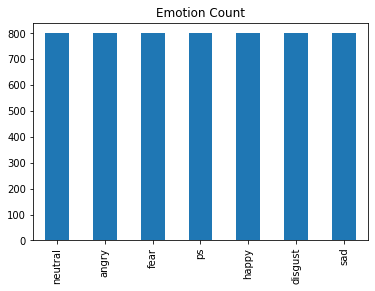

In [9]:
df['Emotion'].value_counts().plot(kind='bar',title='Emotion Count')

In [10]:
## Making the Waveplot
def waveplot(data,sampling_rate,emotion): ## sr is sampling rate
    plt.figure(figsize=(10,5))
    plt.title(emotion, size=15)
    librosa.display.waveplot(data, sr=sampling_rate)
    plt.show()

In [11]:
## Making the Spectogram
def spectogram(data,sampling_rate, emotion):
    data= librosa.stft(data)
    data_db = librosa.amplitude_to_db(abs(data))
    plt.figure(figsize=(10,5))
    plt.title(emotion, size=15)
    librosa.display.specshow(data_db, sr=sampling_rate, x_axis='time', y_axis='hz')
    plt.colorbar()

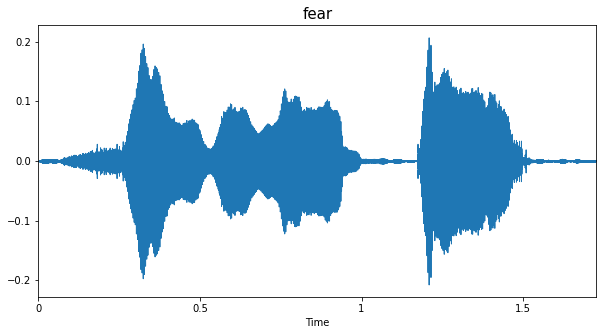

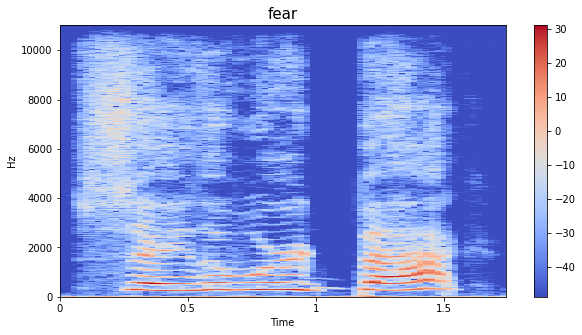

In [12]:
emotion = 'fear'
path = list(df[df['Emotion'] == 'fear']['Speech'])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

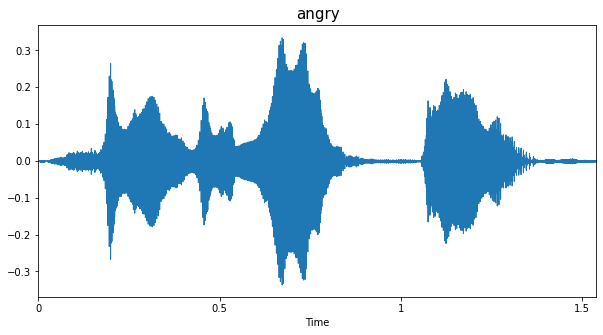

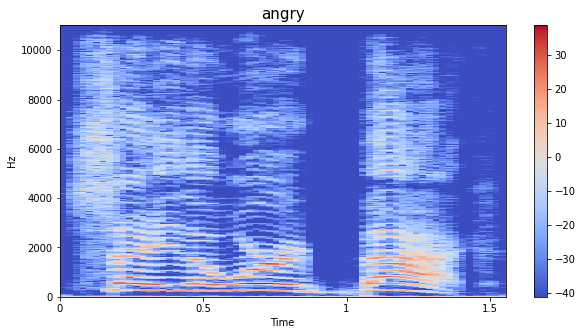

In [13]:
emotion = 'angry'
path = list(df[df['Emotion'] == emotion]['Speech'])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

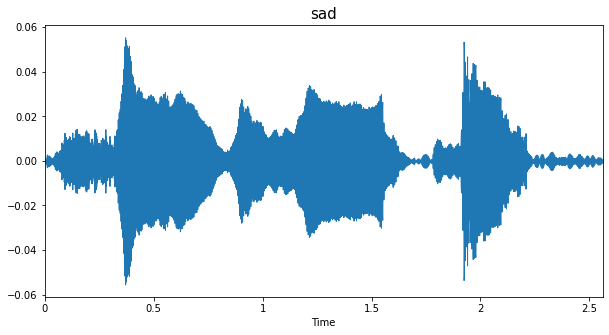

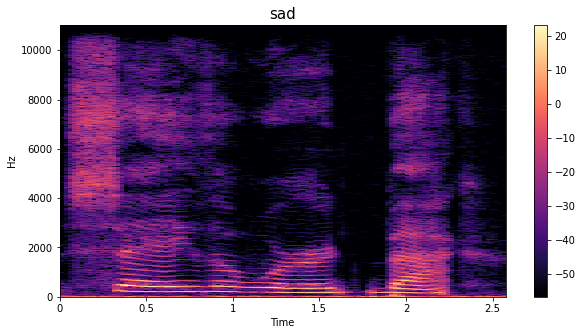

In [14]:
emotion = 'sad'
path = list(df[df['Emotion'] == emotion]['Speech'])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

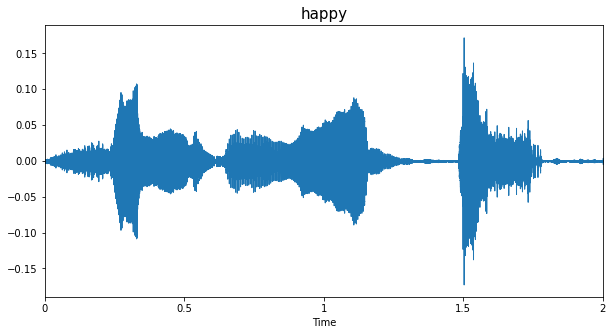

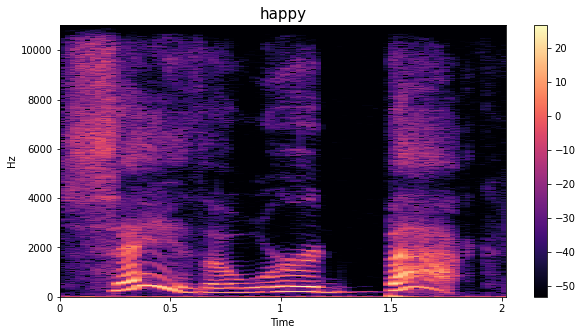

In [15]:
emotion = 'happy'
path = list(df[df['Emotion'] == emotion]['Speech'])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

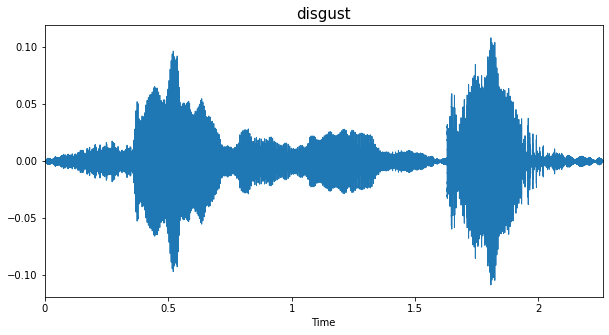

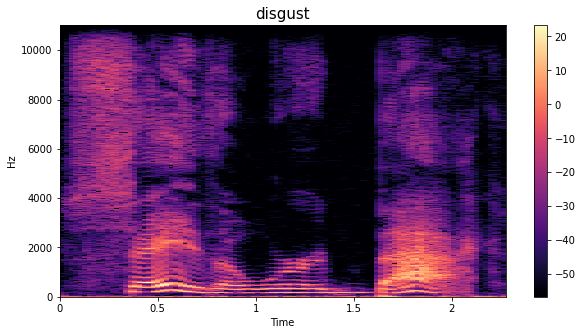

In [16]:
emotion = 'disgust'
path = list(df[df['Emotion'] == emotion]['Speech'])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

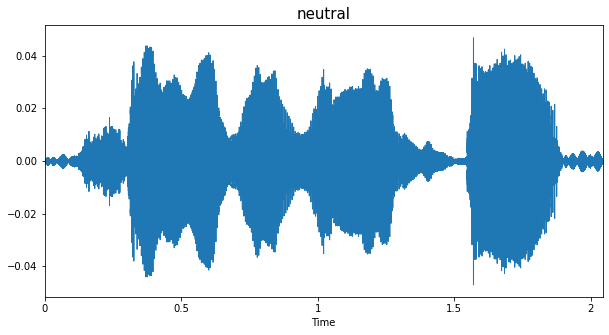

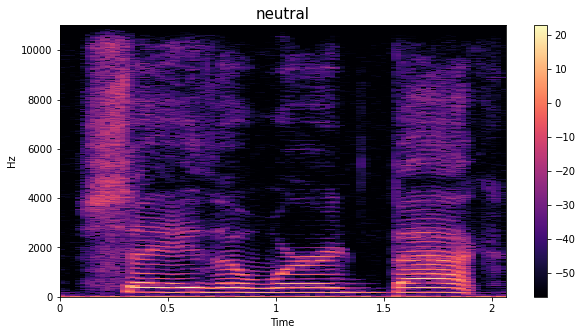

In [17]:
emotion = 'neutral'
path = list(df[df['Emotion'] == emotion]['Speech'])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

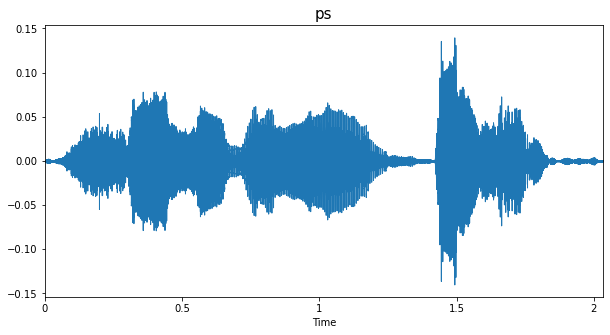

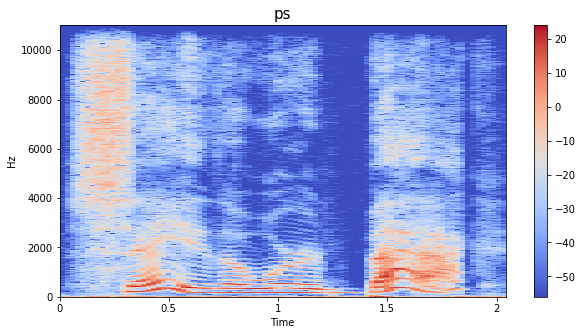

In [18]:
emotion = 'ps'
path = list(df[df['Emotion'] == emotion]['Speech'])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

## Extracting  the features

In [19]:
def mfcc(file):  ## we are extracting the mfcc feature of the file
    data,sampling_rate = librosa.load(file, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=40).T, axis=0)
    return mfcc

In [20]:
mfcc(df['Speech'][0]) ##This is the features we get(40 features)

array([-3.9660403e+02,  7.8255562e+01, -1.9569336e+01, -2.1489851e+01,
       -2.5252991e+00,  1.0445655e+01, -2.1044718e+01, -5.8948507e+00,
       -7.4592462e+00, -5.2469361e-01, -2.1899052e+00,  5.1469743e-01,
        5.5106139e-01,  1.1669711e+00,  2.6338916e+00,  3.3791060e+00,
       -4.8432765e+00, -4.3863821e+00, -1.8235220e+00, -1.0080046e+01,
       -7.6946750e+00, -1.4722955e+00, -7.2105827e+00,  9.8874454e+00,
        8.1233635e+00,  2.1820002e+01,  1.9096575e+01,  2.0362583e+01,
        1.2816748e+01,  8.4005709e+00,  2.0429301e-01,  5.1074352e+00,
        9.3775539e+00,  5.3786030e+00,  2.4897265e+00, -1.6286910e+00,
        4.7148480e+00,  9.0847263e+00,  2.0382314e+00, -1.8096154e+00],
      dtype=float32)

In [21]:
x_mfcc= df['Speech'].apply(lambda x: mfcc(x))

In [22]:
X = [x for x in x_mfcc]
X = np.array(X)
X.shape

(5600, 40)

In [23]:
x=np.expand_dims(X,-1)
x.shape

(5600, 40, 1)

In [29]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
z = enc.fit_transform(df[['Emotion']])

In [30]:
z = z.toarray()

In [32]:
z.shape

(5600, 7)

## Creating the LSTM Model

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(100, return_sequences=False, input_shape=(40,1)),
    Dense(70, activation='relu'),
    Dropout(0.2),
    Dense(35, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 70)                7070      
_________________________________________________________________
dropout (Dropout)            (None, 70)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 35)                2485      
_________________________________________________________________
dropout_1 (Dropout)          (None, 35)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 252       
Total params: 50,607
Trainable params: 50,607
Non-trainable params: 0
____________________________________________________

## Training the model

In [35]:
import tensorflow as tf

In [36]:
tf.config.run_functions_eagerly(True)

In [37]:
# Train the model
model = model.fit(x, z, validation_split=0.2, epochs=50, batch_size=32, shuffle=True)

Epoch 1/50
140/140 [==============================] - 21s 149ms/step - loss: 0.8835 - accuracy: 0.6900 - val_loss: 0.2372 - val_accuracy: 0.9250
Epoch 2/50
140/140 [==============================] - 21s 152ms/step - loss: 0.2641 - accuracy: 0.9205 - val_loss: 0.1952 - val_accuracy: 0.9286
Epoch 3/50
140/140 [==============================] - 21s 151ms/step - loss: 0.1545 - accuracy: 0.9529 - val_loss: 0.1139 - val_accuracy: 0.9643
Epoch 4/50
140/140 [==============================] - 21s 149ms/step - loss: 0.1222 - accuracy: 0.9667 - val_loss: 0.4233 - val_accuracy: 0.8938
Epoch 5/50
140/140 [==============================] - 21s 149ms/step - loss: 0.1301 - accuracy: 0.9623 - val_loss: 0.0713 - val_accuracy: 0.9750
Epoch 6/50
140/140 [==============================] - 22s 154ms/step - loss: 0.0940 - accuracy: 0.9737 - val_loss: 0.0475 - val_accuracy: 0.9875
Epoch 7/50
140/140 [==============================] - 21s 150ms/step - loss: 0.0730 - accuracy: 0.9783 - val_loss: 0.0195 - val_ac

## Plotting the result

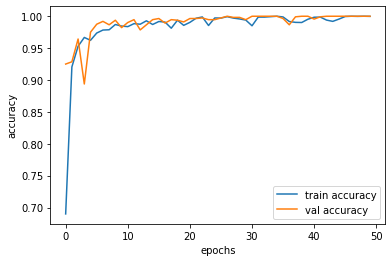

In [42]:
## Accuracy plot
x=list(range(0,50))
y=model.history['accuracy']
z=model.history['val_accuracy']
plt.plot(x, y, label='train accuracy')
plt.plot(x, z, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

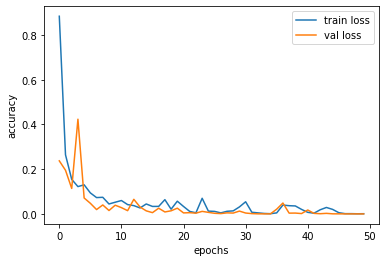

In [43]:
## Loss plot
x=list(range(0,50))
y=model.history['loss']
z=model.history['val_loss']
plt.plot(x, y, label='train loss')
plt.plot(x, z, label='val loss')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()